数据来源 [国家卫生健康委员会](http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml)

1月

日期 | 10日 | 11日| 12日 | 13日| 14日 | 15日| 16日 | 17日| 18日| 19日 | 20日| 21日 | 22日 | 23日 | 24日| 25日 | 26日| 27日 | 28日| 29日 | 30日| 31日
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-:| :-: |:-: |:-: 
确诊| 41 | 41 | 41 | 41 | 41 | 41 | 45 | 62 | 121 | 198 | 291 | 440 | 571 | 830 | 1287| 1975| 2744| 4515| 5974 | 7711 | 9692| 11791 |
重症|  7 |  7 |  6 |  6 | 6  | 5  |  5 |  8 |  -  |  35 | -   | 102 | 95  | 177 | 237 | 324 | 461 | 976 | 1239 | 1370 | 1527| 1795|
死亡|  1 |  1 |  1 |  1 | 1  | 2  |  2 |  2 |  -  |   3 | -   | 9   | 17  | 25  | 41  | 56  | 80  | 106 | 132  | 170| 213| 259 |
治愈|  2 |  6 |  7 |  7 | 7  | 12 | 15 | 19 | 24  |  25 | -   | -   | -   | -   | 38  | 49  | 51  |  60 | 103  | 124 | 171| 243|
疑似|  - |  - |  - |  - |  - |  - |  - |  - |  -  |   - |11+43|?+37 | 393 | 1072| 1965| 2684| 5794| 6973| 9239 | 12167| 15238| 17988 |
密切|739 |763 |763 |763 |763 |763 | 763| 763|  -  | 817 | 1739| 2197| 5897| 9507|15197|23431|32799|47833| 65537| 88693| 113579 | 136987 |
解除| 0  | 46 | 76 |187 |450 |644 | 665| 681|  -  | 727 | 817 | 765 | 969 | 1087|1230 | 1875| 2346| 3701| 5547 | 6746| 11152 | 18509|


2月

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 14380 | 
重症|  2110 |
死亡|  304 |
治愈|  328 |
疑似|  19544 |
密切|- |
解除| -  |


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def mkX(x):
    return np.hstack([x.reshape(-1, 1), x.reshape(-1, 1)**3, x.reshape(-1, 1)**5,  x.reshape(-1, 1)**7,  x.reshape(-1, 1)**9, x.reshape(-1, 1)**11])

In [3]:
y = np.array([41,45,62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380]) #确诊人数
ylen  = len(y)                                                                 #统计日期

x = np.linspace(0, ylen, ylen, endpoint=False)                                 #自变量-时间-单位为天
print(x)

f = interpolate.interp1d(x, y,kind="linear", fill_value = "extrapolate")       #线性插值
xx = np.linspace(0, 40, 100)                                                   #自2020年1月15日开始，后推40天
yy = f(xx)                                                                     #线性插值外推

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


In [4]:
lr = LinearRegression()                                                           #指数函数拟合
lr.fit(x.reshape(-1, 1) , np.log(y.reshape(-1, 1)))

prd1 = lr.predict(xx.reshape(-1, 1))
yy1 = np.e**prd1

MSE = mean_squared_error(y.reshape(-1,1), np.e**( lr.predict(x.reshape(-1,1) ) ))
MSE

3933723.372263933

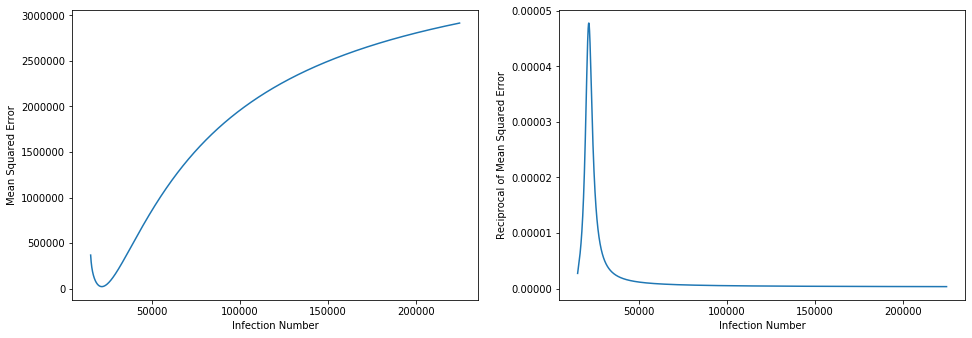

In [5]:
# X = mkX(x)
kL = 15000 * np.linspace(1, 15, 10000)
MSEL = []
IMSEL = []

for k in kL:
    lr2 = LinearRegression()
    lr2.fit(x.reshape(-1, 1), np.log(k / y.reshape(-1, 1) - 1 ))

    prd2 = lr2.predict(xx.reshape(-1, 1))
    yy2 = k /(np.e**prd2 +1)
    MSE = mean_squared_error(y.reshape(-1,1), k / (np.e**(lr2.predict(x.reshape(-1,1)))+1 ))

    MSEL.append(MSE)
    IMSEL.append(1/MSE)
    
plt.figure(figsize=(16, 8/1.5))
plt.subplot(1,2,1)
plt.ylabel("Mean Squared Error")
plt.xlabel("Infection Number")
# plt.yscale("log")
plt.plot(kL, MSEL)

plt.subplot(1,2,2)
plt.ylabel("Reciprocal of Mean Squared Error")
plt.xlabel("Infection Number")
# plt.yscale("log")
plt.plot(kL, IMSEL)

plt.show()

In [6]:
minV = min(MSEL)

print(kL[MSEL.index(minV)], kL[MSEL.index(minV) -1 ], kL[MSEL.index(minV) +1] )

k = kL[MSEL.index(minV)]
lr2 = LinearRegression()
lr2.fit(x.reshape(-1, 1), np.log(k / y.reshape(-1, 1) - 1 ))

prd2 = lr2.predict(xx.reshape(-1, 1))
yy2 = k /(np.e**prd2 +1)
MSE = mean_squared_error(y.reshape(-1,1), k / (np.e**(lr2.predict(x.reshape(-1,1)))+1 ))

MSEL.append(MSE)


21342.634263426342 21321.63216321632 21363.636363636364


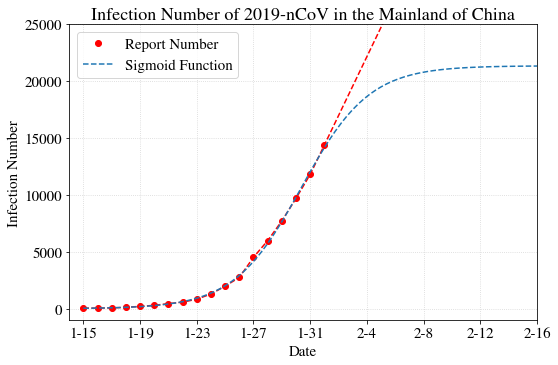

In [8]:
xtk = [0, 4, 8, 12, 16, 20, 24, 28, 32]
xtkshow = ['1-15', '1-19', '1-23', '1-27', '1-31', '2-4', '2-8', '2-12', '2-16']

matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(8, 8/1.5))
plt.plot(x, y, 'o', label = 'Report Number', c = 'red')
plt.plot(xx, yy,'--', c = 'red')
# plt.plot(xx, yy1,'--', label = 'Exponential Function')
plt.plot(xx, yy2,'--', label = 'Sigmoid Function')

endp = 15
plt.xlim(-1, endp)
plt.xticks(xtk, xtkshow)
plt.xlabel("Date")

# plt.yscale('log')
plt.ylim(-1000, 25000)

plt.ylabel("Infection Number")
plt.title("Infection Number of 2019-nCoV in the Mainland of China")
plt.legend()

plt.grid(linestyle = "dotted", color = "#d3d3d3" , which="both")
plt.tight_layout()
plt.show()

/Users/ysc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


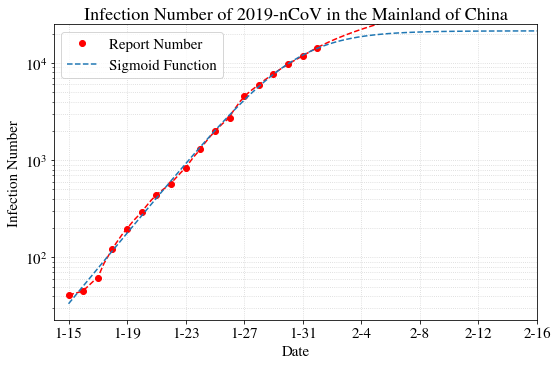

In [9]:
xtk = [0, 4, 8, 12, 16, 20, 24, 28, 32]
xtkshow = ['1-15', '1-19', '1-23', '1-27', '1-31', '2-4', '2-8', '2-12', '2-16']

matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(8, 8/1.5))
plt.plot(x, y, 'o', label = 'Report Number', c = 'red')
plt.plot(xx, yy,'--', c = 'red')
# plt.plot(xx, yy1,'--', label = 'Exponential Function')
plt.plot(xx, yy2,'--', label = 'Sigmoid Function')

endp = 15
plt.xlim(-1, endp)
plt.xticks(xtk, xtkshow)
plt.xlabel("Date")

plt.yscale('log')
plt.ylim(-1000, 25000)

plt.ylabel("Infection Number")
plt.title("Infection Number of 2019-nCoV in the Mainland of China")
plt.legend()

plt.grid(linestyle = "dotted", color = "#d3d3d3" , which="both")
plt.tight_layout()
plt.show()

In [42]:
prd3 = lr2.predict([[17]])
yy3 = k /(np.e**prd3 +1)
yy3

array([[13666.64791836]])

In [39]:
13667 - 11791

1876

In [13]:
print (kL[MSEL.index(minV)], lr2.coef_, lr2.intercept_)

21342.634263426342 [[-0.41969585]] [6.45929569]
